In [19]:
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function
import copy

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]


mu = np.zeros(2) # mean (mu) as a zero vector
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]]) # covariance matrix
num_samples = 4  # Number of samples you want to generate

point_number = 1 # Point you want to test
point_index = 0 # Index you want to test

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points

In [20]:
# Function af x
sum = Loss_function(points,Y)
print(sum)

# Function af x+epsilon
point_e = copy.deepcopy(points)
point_e[point_number][point_index] += 0.001 # Update the point[1][0]
sum_e = Loss_function(point_e,Y)
print(sum_e)

# Gradient af x
gradient = Gradient_function(point_number,point_index,Y,points)
print(gradient)

# Error
(sum_e-sum)/0.001-(gradient)

-14.010219275601166
-14.006404088026994
3.816340741196239


-0.001153167023698387

In [23]:
hist = np.zeros(1000) # Number of test
for n in range(1000):
    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
    
    sum = Loss_function(points,Y) # Function af x

    point_e = copy.deepcopy(points)
    point_e[point_number][point_index] += 0.001 # Update the point[1][0]
    sum_e = Loss_function(point_e,Y) # Function af x+epsilon
    
    gradient = Gradient_function(point_number,point_index,Y,points) # Gradient af x
            
    hist[n] = (sum_e-sum)/0.001-(gradient) # Error

(array([ 3.,  2.,  2.,  3.,  3.,  1.,  3.,  9.,  8.,  6., 13., 11., 15.,
        22., 25., 37., 87., 44., 55., 71., 79., 66., 49., 57., 73., 83.,
        36., 33., 38., 66.]),
 array([-4.72294993e-03, -4.49969586e-03, -4.27644178e-03, -4.05318771e-03,
        -3.82993364e-03, -3.60667956e-03, -3.38342549e-03, -3.16017142e-03,
        -2.93691734e-03, -2.71366327e-03, -2.49040920e-03, -2.26715512e-03,
        -2.04390105e-03, -1.82064698e-03, -1.59739290e-03, -1.37413883e-03,
        -1.15088476e-03, -9.27630684e-04, -7.04376610e-04, -4.81122537e-04,
        -2.57868464e-04, -3.46143903e-05,  1.88639683e-04,  4.11893756e-04,
         6.35147830e-04,  8.58401903e-04,  1.08165598e-03,  1.30491005e-03,
         1.52816412e-03,  1.75141820e-03,  1.97467227e-03]),
 <BarContainer object of 30 artists>)

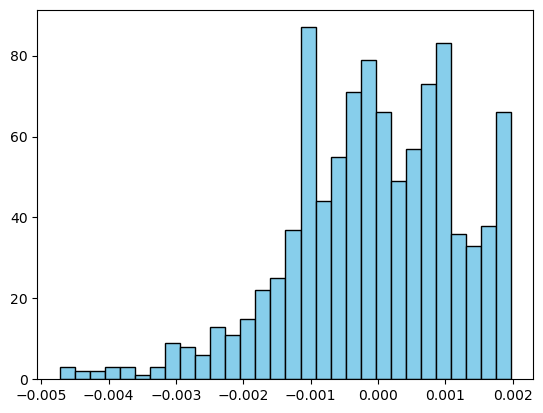

In [24]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')